<a href="https://colab.research.google.com/github/Saketh2611/Diabetes-Predictor/blob/main/Diabetis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset of Diabetes .csv to Dataset of Diabetes .csv


IMPORT NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [3]:
data = pd.read_csv('Dataset of Diabetes .csv')

PREVIEVING DATASET

In [5]:
print(data.head())
data = data[data['CLASS'] != 'P']
print("DATASET SHAPE(rows,columns) : " , data.shape)

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  
DATASET SHAPE(rows,columns) :  (947, 14)


Doing necessary classification

In [6]:
obj = (data.dtypes == 'object')
object_column = list(obj[obj].index)
print(object_column)

int_ = (data.dtypes== 'int')
num_column = list(int_[int_].index)

fl = (data.dtypes == 'float')
fl_column = list(fl[fl].index)

['Gender', 'CLASS']


CORRELATION HEATMAP

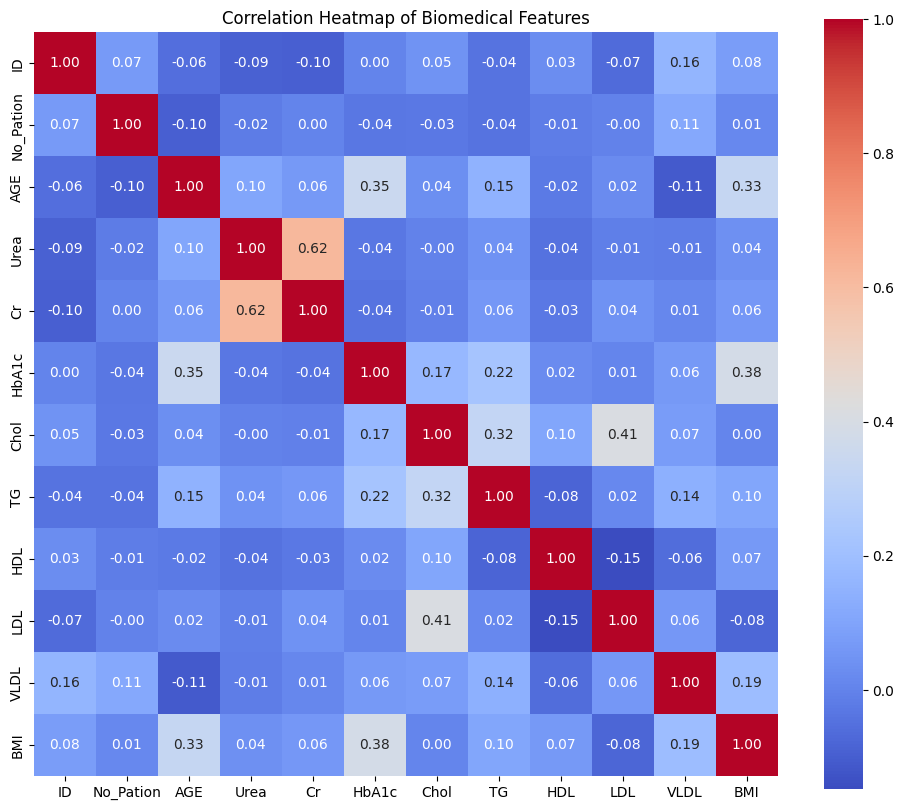

In [7]:
# Drop non-numeric/identifier columns
df_numeric = data.drop(object_column , axis = 1)

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Biomedical Features')
plt.show()

LABEL ENCODING GENDER

In [8]:
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

PROPERLY SEPERATING INPUTS AND OUTPUTS AS (x and y)

In [9]:
data['CLASS'] = data['CLASS'].str.strip()
x = data.drop(['CLASS'] , axis = 1)
y = data['CLASS']
xData = x.values
yData = y.values

SPLITTING OF TRAINING DATA AND TEST DATA

In [10]:
#TRAIN_TEST SPLIT
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(xData , yData , test_size = 0.2 , random_state = 42)

PROPER TRAINING OF THE MODEL (class_weight='balanced' makes the model pay more attention to the minority class during training by adjusting the weight (importance) of each class internally.)

In [11]:
#ML MODELS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Handle class imbalance
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(xTrain, yTrain)

yPred = model.predict(xTest)

CLASSIFICATION REPORT

In [ ]:
print("Accuracy:", accuracy_score(yTest, yPred))
print("Classification Report:\n", classification_report(yTest, yPred, zero_division=0))

CONFUSION MATRIX

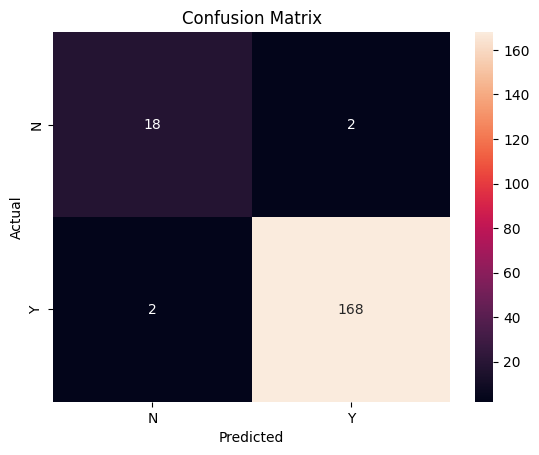

In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(yTest , yPred)

sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()